In [1]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import numpy as np
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

C:\Users\Thiago\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('../../data/star_classification.csv')
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


<font color="blue">Pré-Processamento<font>
------------------

In [3]:
df_4classification= df.drop(['MJD','run_ID','rerun_ID','obj_ID','spec_obj_ID','field_ID','fiber_ID'], axis = 1)
#df_4classification['class'],aux = pd.factorize(df['class'])
# galaxia = 0 ,QSO= 1 ,estrela = 2
df_4classification

,alpha,delta,u,g,r,i,z,cam_col,class,redshift,plate
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,GALAXY,0.634794,5812
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,GALAXY,0.779136,10445
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,GALAXY,0.644195,4576
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,GALAXY,0.932346,9149
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3,GALAXY,0.116123,6121
...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,2,GALAXY,0.000000,9374
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,1,GALAXY,0.404895,7626
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,4,GALAXY,0.143366,2764
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,4,GALAXY,0.455040,6751


<font color="Green">Oversampling<font>
----

In [4]:
y= df_4classification['class']
X=df_4classification.drop('class' ,axis = 1)
ros = RandomOverSampler(random_state=0)
X_ros,y_ros = ros.fit_resample(X,y)
print('Resampled dataset shape %s' % Counter(y_ros))

Resampled dataset shape Counter({'GALAXY': 59445, 'QSO': 59445, 'STAR': 59445})


In [5]:
class_frequency = df['class'].map(len)

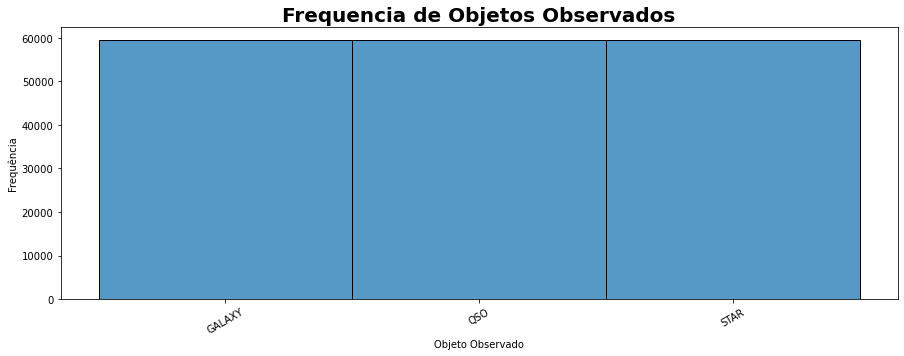

In [6]:
plt.figure(figsize=(15, 5))
plt.title('Frequencia de Objetos Observados', fontsize=20, weight='bold')
sns.histplot(
    data=class_frequency,
    bins=class_frequency.nunique(),
    x= y_ros
)
plt.xticks(rotation=30)
plt.xlabel('Objeto Observado')
plt.ylabel('Frequência')
plt.show()

Testando Normalização com dois métodos diferentes:
---






<font color="purple">Método 1:
    

In [7]:
MinMaxScaler = MinMaxScaler()
X1= MinMaxScaler.fit_transform(X_ros)  

<font color="purple">Método 2:

In [8]:
scaler = StandardScaler()  
scaler.fit(X_ros)
X2=scaler.transform(X_ros)

<font color="blue">Separando dados de treino e de teste<font>
-------

<font color="purple">Método 1:

In [9]:
#random_state = 2 e 6 dão ótimas acurácias
X1_train, X1_test, y1_train, y1_test = train_test_split ( 
          X1, y_ros, test_size = 0.25, random_state =6)

<font color="purple">Método 2:

In [10]:
X2_train, X2_test, y2_train, y2_test = train_test_split ( 
          X2, y_ros, test_size = 0.25, random_state = 0)

<font color="blue">Modelo de Naive Bayes<font>
---------

<font color="purple">Método 1:

In [11]:
gnb1 = GaussianNB()
gnb1.fit(X1_train, y1_train)

GaussianNB()

In [12]:
predict1 = gnb1.predict(X1_test)
predict1

array(['STAR', 'QSO', 'GALAXY', ..., 'GALAXY', 'STAR', 'GALAXY'],
      dtype='<U6')

<font color="purple">Método 2:

In [13]:
gnb2= GaussianNB()
gnb2.fit(X2_train, y2_train)

GaussianNB()

In [14]:
predict2 = gnb2.predict(X2_test)
predict2

array(['STAR', 'GALAXY', 'QSO', ..., 'QSO', 'GALAXY', 'QSO'], dtype='<U6')

<font color="blue">Métricas de avaliação<font>
-----

<font color="purple">Método 1:

In [15]:
accuracy_score(y1_test, predict1)

print(classification_report(y1_test, predict1))

              precision    recall  f1-score   support

      GALAXY       0.61      0.84      0.71     14936
         QSO       0.71      0.91      0.80     14769
        STAR       0.99      0.33      0.50     14879

    accuracy                           0.69     44584
   macro avg       0.77      0.70      0.67     44584
weighted avg       0.77      0.69      0.67     44584



<font color="purple">Método 2:

In [16]:
accuracy_score(y2_test, predict2)

print(classification_report(y2_test, predict2))

              precision    recall  f1-score   support

      GALAXY       0.61      0.85      0.71     14829
         QSO       0.72      0.91      0.80     14999
        STAR       0.99      0.33      0.50     14756

    accuracy                           0.70     44584
   macro avg       0.77      0.70      0.67     44584
weighted avg       0.77      0.70      0.67     44584



<font color="blue">Matriz de Confusão<font>
----------

In [17]:
class_names = ['GALAXY', 'QUASAR', 'STAR']

<font color="purple">Método 1:

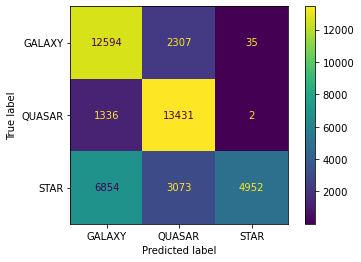

In [18]:
plot_confusion_matrix(gnb1, X1_test, y1_test, 
                      display_labels = class_names)

<font color="purple">Método 2:

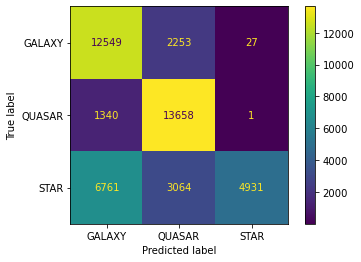

In [19]:
plot_confusion_matrix(gnb2, X2_test, y2_test, 
                      display_labels = class_names)

<font color="Blue">Testando outra forma de balancear os dados
-----

<font color="Green">Undersampling<font>
----

Já que com o oversampling a acurácia ficou relativamente baixa, irei testar se com undersampling as coisas mudam.Irei Utilizar o StandarScaler que se provou ser um pouco mais eficiente para esse tipo de problema

In [20]:
rus = RandomUnderSampler(random_state=0)
X_rus, y_rus = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_rus))

Resampled dataset shape Counter({'GALAXY': 18961, 'QSO': 18961, 'STAR': 18961})


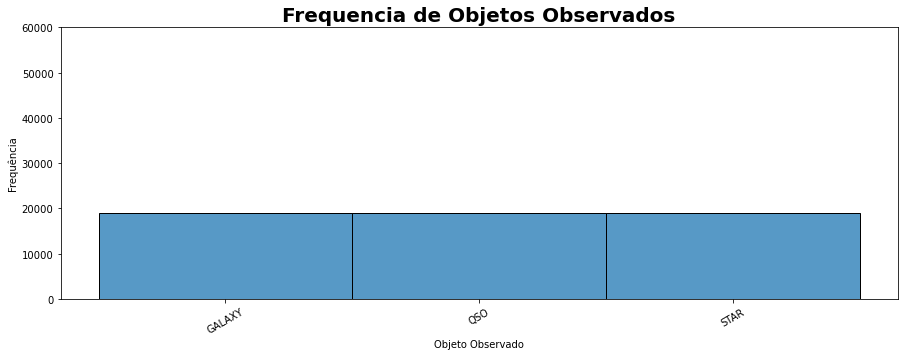

In [21]:
plt.figure(figsize=(15, 5))
plt.title('Frequencia de Objetos Observados', fontsize=20, weight='bold')
sns.histplot(
    data=class_frequency,
    bins=class_frequency.nunique(),
    x= y_rus

)
plt.ylim(0, 60000)
plt.xticks(rotation=30)
plt.xlabel('Objeto Observado')
plt.ylabel('Frequência')
plt.show()

In [22]:
scaler2 = StandardScaler()  
scaler2.fit(X_rus)
X3=scaler2.transform(X_rus) 
X3_train, X3_test, y3_train, y3_test = train_test_split ( 
          X3, y_rus, test_size = 0.25, random_state =2)
gnb3 = GaussianNB()
gnb3.fit(X3_train, y3_train)
predict3 = gnb3.predict(X3_test)
accuracy_score(y2_test, predict2)

print(classification_report(y3_test, predict3))

              precision    recall  f1-score   support

      GALAXY       0.55      0.85      0.67      4786
         QSO       0.71      0.90      0.79      4702
        STAR       1.00      0.19      0.31      4733

    accuracy                           0.65     14221
   macro avg       0.75      0.65      0.59     14221
weighted avg       0.75      0.65      0.59     14221



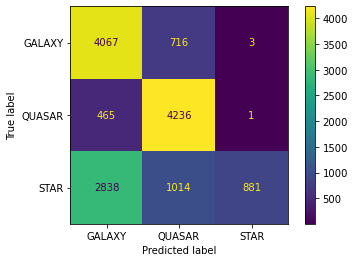

In [23]:
plot_confusion_matrix(gnb3, X3_test, y3_test, 
                      display_labels = class_names)

A utilização do undersampling se provou menos eficiente visto que sua acurácia é 0,65 contra 0,70 para o oversampling

Conclusão:
-----
O melhor classificador que eu encontrei para naive bayes foi usando o StandardScaler e com Oversampling para balancear os dados